In [8]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
from sklearn import model_selection
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [9]:
data_root_dir = r'D:\CIC\Train and Test\Filtered 40 - DT'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [10]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()


# 'n_estimators' is equal to the numebr of trees
adaBoost1 = AdaBoostClassifier(n_estimators=100)
adaBoost1.fit(X_train, y_train)

predictions = adaBoost1.predict(X_test)
confusion_matrix(y_test, predictions)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

print(f"Total time: {endTime - startTime:0.4f} seconds \n")

Total time: 8670.8025 seconds 



In [11]:
results = confusion_matrix(y_test, predictions)
error = zero_one_loss(y_test, predictions)
score = accuracy_score(y_test, predictions) * 100
report = classification_report(y_test, predictions)


In [12]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("AdaBoost Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{results[0]}")
print(f"{results[1]} \n")

print("Report :")
print(report) 

print(f"True Postive   : {results[0][0]}")
print(f"False Positive : {results[0][1]}")
print(f"False Negative : {results[1][0]}")
print(f"True Negative  : {results[1][1]}")
print(f"Error Value    : {error}")
print(f"Accuracy_Score : {score}")
print("=================================================")

Total time: 8670.8025 seconds 

AdaBoost Classifier Results
Confusion Matrix:
[3997098   19572]
[ 50376 774127] 

Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   4016670
           1       0.98      0.94      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.98      0.97      0.97   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 3997098
False Positive : 19572
False Negative : 50376
True Negative  : 774127
Error Value    : 0.014448564428496957
Accuracy_Score : 98.5551435571503


In [13]:
X_test.shape

(4841173, 40)

In [14]:
feature_importances = pd.Series(adaBoost1.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Init Fwd Win Byts    0.28
Fwd Pkt Len Max      0.08
Flow IAT Min         0.08
Dst Port             0.06
Fwd Header Len       0.05
Init Bwd Win Byts    0.05
Flow IAT Mean        0.05
Bwd Seg Size Avg     0.04
Fwd IAT Tot          0.03
Fwd IAT Min          0.03
Bwd IAT Max          0.03
Fwd IAT Max          0.02
Fwd Pkt Len Mean     0.02
Idle Mean            0.02
TotLen Fwd Pkts      0.02
Idle Max             0.01
ACK Flag Cnt         0.01
Bwd Pkts/s           0.01
Fwd Seg Size Min     0.01
Fwd Pkts/s           0.01
Bwd Header Len       0.01
Bwd IAT Std          0.01
Flow IAT Max         0.01
Bwd Pkt Len Max      0.01
Bwd IAT Tot          0.01
Fwd IAT Std          0.01
Bwd Pkt Len Mean     0.01
Flow Byts/s          0.01
Fwd IAT Mean         0.01
Flow IAT Std         0.00
Fwd Act Data Pkts    0.00
Flow Pkts/s          0.00
Bwd IAT Min          0.00
Subflow Fwd Pkts     0.00
Flow Duration        0.00
URG Flag Cnt         0.00
PSH Flag Cnt         0.00
FIN Flag Cnt         0.00
Bwd IAT Mean

Top 20 features:
---------------------------------
Init Fwd Win Byts    0.28
Fwd Pkt Len Max      0.08
Flow IAT Min         0.08
Dst Port             0.06
Flow IAT Mean        0.05
Fwd Header Len       0.05
Init Bwd Win Byts    0.05
Bwd Seg Size Avg     0.04
Fwd IAT Tot          0.03
Fwd IAT Min          0.03
Bwd IAT Max          0.03
TotLen Fwd Pkts      0.02
Fwd Pkt Len Mean     0.02
Fwd IAT Max          0.02
Idle Mean            0.02
Bwd Pkt Len Max      0.01
Bwd Pkt Len Mean     0.01
Flow Byts/s          0.01
Flow IAT Max         0.01
Fwd IAT Mean         0.01
dtype: float64


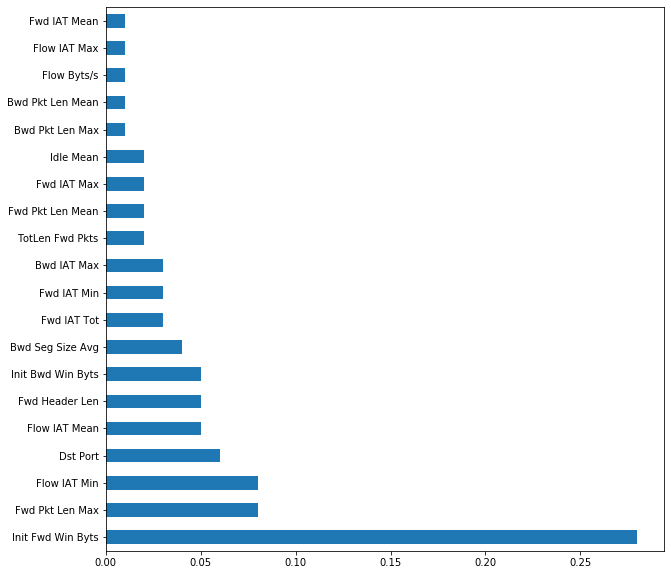

In [15]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Flow Duration        0.00
Flow Pkts/s          0.00
Flow IAT Std         0.00
Bwd IAT Mean         0.00
Bwd IAT Min          0.00
FIN Flag Cnt         0.00
PSH Flag Cnt         0.00
URG Flag Cnt         0.00
Subflow Fwd Pkts     0.00
Fwd Act Data Pkts    0.00
Idle Min             0.00
Bwd Pkt Len Max      0.01
Bwd Pkt Len Mean     0.01
Flow Byts/s          0.01
Flow IAT Max         0.01
Fwd IAT Mean         0.01
Fwd IAT Std          0.01
Bwd IAT Tot          0.01
Bwd IAT Std          0.01
Bwd Header Len       0.01
dtype: float64


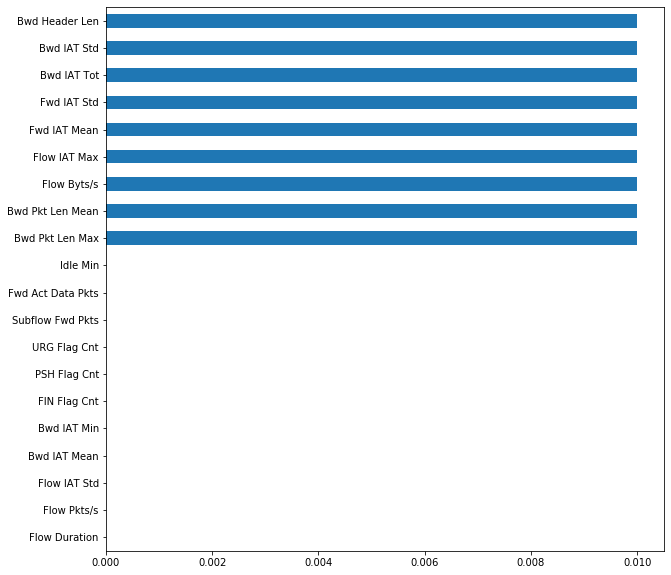

In [16]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))